<a href="https://colab.research.google.com/github/inhyek/machine_learning_toddler/blob/master/%5B%EA%B3%B5%EB%A3%A1%EC%B1%85%5D3_%EC%A0%95%ED%99%95%EB%8F%84%EC%B8%A1%EC%A0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 평가

In [0]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
!ls /gdrive/My\ Drive/Colab\ Notebooks/

 탈잉				      dr
'블로그&부동산데이터'		      Iris.csv
 여름방학_백준_문제풀이		     'Machine Learning with Iris Dataset.ipynb'
 여름방학_머신러닝		      pandas_RNN_LSTM
'01.연습문제.ipynb의 사본'	     'RNN, LSTM, Word2Vec 발표자료.ipynb'
'1주차(0724).ipynb'		      titanic_train.csv
'3.비지도학습과 데이터전처리.ipynb'   Untitled0.ipynb


이번 장에서는 모델의 성능을 평가하는 방법에 대해서 배웁니다.
보통 성능 평가 지표(Evaluation Metric)는 모델이 분류나 회귀냐에 따라 여러 종류로 나뉩니다.

우리가 예전에 배웠던 방법은 모델의 예측값과 실제 값이 얼마나 일치하는 지를 확인하는 'Accuracy(정확도)' 라는 방법이었으나,
단순히 정확도만 확인하면 안되는 경우들이 있습니다.

따라서, 이번 장에서는 
- 이러한 문제들이 발생하게 되는 케이스와 함께 
- 평가방법들에 대해서 설명하겠습니다.

먼저 분류의 성능 평가 지표부터 살펴보겠습니다.
- 정확도(Accuracy)
- 오차행렬(Confusion Matrix)
- 정밀도(Precision)
- 재현률(Recall)
- F1 스코어
- ROC AUC

## 3-1 Accuracy(정확도)

정확도는 실제 데이터에서 예측 데이터가 얼마나 같은지를 판단하는 지표입니다.

- 정확도 = 예측결과가 동일한 데이터 건수 / 전체 데이터 건수 

정확도는 간결하고 직관적으로 모델 예측 성능을 나타내는 지표입니다.
하지만 정확도로만 판단을 하면 문제가 생기는 경우가 있습니다.

타이타닉 생존자 예측 과제를 가지고 살펴보면,
생존자 중 여자의 비율이 많기 때문에
별다른 알고리즘 없이 무조건 성별이 여자인 경우를 생존으로, 남자인 경우를 사망으로 예측해도 비슷한 결과가 나올 수 있습니다.

다음 코드는 BaseEstimator 클래스를 상속받아 
아무런 학습을 하지 않고.
성별에 다라 생존자를 예측하는 단순한 Classifier를 생성해서 학습/예측/평가한 결과입니다.

In [0]:
import numpy as np
from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator):
    # fit( ) 메소드는 아무것도 학습하지 않음. 
    def fit(self , X , y=None):
            pass
    
    ##### predict( ) 메소드는 단순히 Sex feature가 1 이면 0 , 그렇지 않으면 1 로 예측함. #####
    def predict(self, X):
        pred = np.zeros( ( X.shape[0] , 1))
        for i in range (X.shape[0]) :
            if X['Sex'].iloc[i] == 1:
                pred[i] = 0
            else :
                pred[i] = 1
        
        return pred

In [0]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

# 레이블 인코딩 수행. 
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 원본 데이터를 재로딩, 데이터 가공, 학습데이터/테스트 데이터 분할. 
titanic_df = pd.read_csv('/gdrive/My Drive/Colab Notebooks/titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df, \
                                                  test_size=0.2, random_state=0)

# 위에서 생성한 Dummy Classifier를 이용하여 학습/예측/평가 수행. 
myclf = MyDummyClassifier()
myclf.fit(X_train ,y_train)

mypredictions = myclf.predict(X_test)
print('Dummy Classifier의 정확도는: {0:.4f}'.format(accuracy_score(y_test , mypredictions)))

Dummy Classifier의 정확도는: 0.7877


이렇게 단순한 알고리즘으로 예측을 하더라도 데이터의 구성에 따라 정확도는 78.8%가 나올 수 있습니다.
(c.f. label의 개수가 불균형한 경우)

###  다음으로 MNIST 데이터셋을 가지고 불균형 데이터셋을 만들어 정확도를 확인해 보겠습니다.

- MNIST 란? : 0부터 9까지 숫자에 대한 손글씨 이미지 데이터


<img src = "https://corochann.com/wp-content/uploads/2017/02/mnist_plot-800x600.png">


설명 참고 : https://codeonweb.com/entry/12045839-0aa9-4bad-8c7e-336b89401e10



#### multi classification ---> binary classification
#### label이 7 인것 = True(10%), label이 7이 아닌 것 = False(90%)으로 변환
#### 이름은 MyFakeClassifier


In [0]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator):
    def fit(self,X,y):
        pass
    
    # 입력값으로 들어오는 X 데이터 셋의 크기만큼 모두 0값으로 만들어서 반환
    def predict(self,X):
        return np.zeros( (len(X),1) , dtype=bool)

# 사이킷런의 내장 데이터 셋인 load_digits( )를 이용하여 MNIST 데이터 로딩
digits = load_digits()

# digits번호가 7번이면 True이고 이를 astype(int)로 1로 변환, 7번이 아니면 False이고 0으로 변환. 
y = (digits.target == 7).astype(int)
X_train, X_test, y_train, y_test = train_test_split( digits.data, y, random_state=11)

In [0]:
# 불균형한 레이블 데이터 분포도 확인. 
print('레이블 테스트 세트 크기 :', y_test.shape)
print('테스트 세트 레이블 0 과 1의 분포도')
print(pd.Series(y_test).value_counts())

# Dummy Classifier로 학습/예측/정확도 평가
fakeclf = MyFakeClassifier()
fakeclf.fit(X_train , y_train)
fakepred = fakeclf.predict(X_test)
print('모든 예측을 0으로 하여도 정확도는:{:.3f}'.format(accuracy_score(y_test , fakepred)))

레이블 테스트 세트 크기 : (450,)
테스트 세트 레이블 0 과 1의 분포도
0    405
1     45
dtype: int64
모든 예측을 0으로 하여도 정확도는:0.900


## 3-2 오차행렬(Confusion Matrix)

True/False, Positive/Negative의 4분면으로 구성되는 행렬입니다.
이 방법으로는
- 예측 오류가 얼마인지 뿐만 아니라
- **어떠한 유형의 예측 오류**가 발생하고 있는지를
알 수 있다는 장점이 있습니다.

<img src = "https://2.bp.blogspot.com/-EvSXDotTOwc/XMfeOGZ-CVI/AAAAAAAAEiE/oePFfvhfOQM11dgRn9FkPxlegCXbgOF4QCLcBGAs/s1600/confusionMatrxiUpdated.jpg">


### [직관적인 버전]



<img src = "https://skappal7.files.wordpress.com/2018/08/confusion-matrix.jpg?w=748">

사이킷런은 오차행렬을 구하기 위해   confusion_matrix() API를 제공합니다.


In [0]:
from sklearn.metrics import confusion_matrix

# 앞절의 예측 결과인 fakepred와 실제 결과인 y_test의 Confusion Matrix출력
confusion_matrix(y_test , fakepred)

array([[405,   0],
       [ 45,   0]])

#### TP, TN, FP, FN 값은  Classifier 성능의 여러 면보를 판단할 수 있는 기반 정보를 제공합니다. 

#### 이 값을 조합해서  Classifier의 성능을 측정할 수 있는 주요 지표인 정확도(Accuracy), 정밀도(Precison), 재현율(Recall)값을 알 수 있습니다.


앞에서 소개한 정확도를 가지고 이야기 하면, 

암 검진 예측 모형이나 사기 판별 모형 등 label이 불균형한 데이터셋에서

Positive(양성) 보다는  Negative(음성)로 인해 예측 정확도가 높아지는 경향이 발생하게 되는 것입니다.

다음으로 불균형한 데이터셋에서 정확도 보다 더 선호되는 평가 지표인 정밀도(Precision)와 재현율(Recall)에 대해서 알아보겠습니다.

## 3-3 정밀도와 재현율(Precision과 Recall)

정밀도와 재현율은 Positive 데이터 세트의 예측 성능에 좀 더 초점을 맞춘 평가 지표입니다.

구현 공식은 다음과 같습니다.

- 재현율(Recall, Sensitivity) : TP / (FN + TP) - 실제로 답이 Positive인 것 중 Positive 로 예측한 비율 

- 정밀도(Precision) : TP/ ( FP + TP)  - Positive라고 예측한 것 중 실제로 답이 Positive인 비율 


둘 다 TP를 높이는데 초점이 맞춰져 있지만, 재현율은 FN(실제는 양성인데 음성으로 잘못 예측)를 낮추는데, 정밀도는  FP(실제로는 음성인데 양성으로 잘못 예측)를 낮추는데 초점을 맞춥니다. 
이 같은 특성 때문에 재현율과 정밀도는 서로 보완적인 지표로 분류의 성능을 평가하는데 적용됩니다.
가장 좋은 성능 평가는 두 항목에서 모두 높은 수치를 얻는 것입니다.
반면, 둘 중 어느 한 평가 지표만 매우 높고 다른 수치는 매우 낮은 결과를 나타내는 경우는 바람직하지 않습니다.


또한, 데이터의 특성에 따라서 재현율 또는 정밀도 중 무엇이 보다 중요한지가 달라질 수 있습니다.

재현율이 중요 지표인 경우는 실제 Positive 양성 데이터를 Negative로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우입니다.
예를들어 암 판단 모델은 재현율이 훨씬 중요한 지표입니다. 왜냐면 실제 Positive인 환자를 Negative로 예측하는 경우 오류의 대가가 생명을 앗아갈 정도로 심각하기 때문입니다.
반면에 실제 Negative인 건강한 환자를 암 환자인 Positive로 예측한 경우면 다시 한 번 재검사를 하는 수준의 비용이 소모될 것입니다.

반면, 정밀도가 더 중요한 지표인 경우도 있습니다.
예를들어 스팸메일 여부를 판단하는 모델의 경우 실제 Positive인 스팸메일을 Negative인 일반 메일로 분류하더라도 사용자가 불편함을 느끼는 정도이지만, 실제 Negative인 일반 메일을 Positive인 스팸메일로 분류할 경우에는 메일을 아예 받지 못하게 돼 업무에 차질이 생깁니다.

- 재현율이 상대적으로 더 중요한 경우는 실제 Positive인 데이터 예측을 Negative로 잘못 판단하게 되면 업무에 큰 영향이 발생하는 경우

- 정밀도가 상대적으로 더 중요한 경우는 실제 Negative 음성인 데이터 예측을 Positve 양성으로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우



### [참고할만한 코드] -오차행렬, 정밀도, 재현율로 예측 성능 평가하기


다음은 타이타닉 예제에서 오차행렬, 정밀도, 재현율을 모두 구해서 예측성능을 평가한 것입니다.

정밀도 계산은 precison_score()를, 재현율 계산을 위해서는 recall_score()를 사용하면 됩니다. 

여기서는 평가를 간편하게 적용하기 위해 get_clf_eval() 함수를 만들어서 confusion matrix, accuracy, precision, recall을 평가했습니다.


In [0]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix


# 예측성능 평가하는 함수
def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy , precision ,recall))

In [0]:
#로지스틱 회귀를 기반으로 타이타닉 생존자를 예측한 후, 예측값에 대한 성능을 평가함

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression

# 원본 데이터를 재로딩, 데이터 가공, 학습데이터/테스트 데이터 분할. 
titanic_df = pd.read_csv('/gdrive/My Drive/Colab Notebooks/titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, \
                                                    test_size=0.20, random_state=11)

lr_clf = LogisticRegression()

lr_clf.fit(X_train , y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test , pred)

오차 행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


정밀도에 비해 재현율이 낮게 나왔습니다.
재현율을 강화할 방법은 무엇일까요?

### 정밀도/재현율 트레이드 오프(Precision/Recall Trade-off)

분류하려는 업무의 특성상 정밀도 또는 재현율이 특별히 강조돼야 할 경우 분류의 결정 임곗값(Threshold)을 조정해 정밀도 또는 재현율의 수치를 높일 수 있습니다.

하지만 이들은 어느 한 쪽을 강제로 높이면 다른 하나의 수치는 떨어지기 쉬운 Trade-off의 관계에 있습니다. 

이진분류 모델은 보통 확률값을 0 또는 1로 변환합니다. 가령, 어떤 모델에서 특정 데이터가 0이 될 확률이 10%, 1이 될 확률이 90%라면 최종 예측은 더 큰 확률을 가진 1로 예측합니다. 일반적으로 이진 분류에서는 이 임곗값을   0.5, 즉 50%로 정하고 이 기준값보다 확률이 크면 Positive , 작으면 Negative로 결정합니다.

사이킷런에는 개별 데이터별로 예측 확률을 반환하는 메서드인 predict_proba()라는 것이 있습니다. 
- 입력값: X_test
- 출력값: 개별 클래스의 예측확률을 array 형태로 반환. 입력 데이터가 100개이고 예측 클래스가 2개라면 100 x 2의 array로 반환.
 
  각 열은 개별 클래스의 예측 확률임. 첫번째 열은 0의 확률, 두번째 열은 1의 확률임.

In [0]:
## 바로 앞 예제의 타이타닉 생존자 데이터를 학습한 로지스틱 리그레션 객체에서 predict_proba()메서드를 수행한 뒤 반환값을 확인하고, predict() 메서드의 결과와 비교해 보았습니다.

pred_proba = lr_clf.predict_proba(X_test)
pred  = lr_clf.predict(X_test)
print('pred_proba()결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

# 예측 확률 array 와 예측 결과값 array 를 concatenate 하여 예측 확률과 결과값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba , pred.reshape(-1,1)],axis=1)
print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n',pred_proba_result[:3])


pred_proba()결과 Shape : (179, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.44935227 0.55064773]
 [0.86335512 0.13664488]
 [0.86429645 0.13570355]]
두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.44935227 0.55064773 1.        ]
 [0.86335512 0.13664488 0.        ]
 [0.86429645 0.13570355 0.        ]]


여기서 분류 임계값을 조절해 정밀도와 재현율 수치를 조정할 수 있습니다. 


Binarizer  클래스를 사용하겠습니다.
예제에는 행렬에 있는 숫자들이 1.1이라는 임계치보다 크면 1을, 작으면 0을 반환하는 코드가 구현되어 있습니다.

In [0]:
## Binarizer를 불러옵니다. 
from sklearn.preprocessing import Binarizer 

## X 데이터를 만들었습니다. 3 x3 사이즈 입니다. 

X = [[ 1, -1,  2],
     [ 2,  0,  0],
     [ 0,  1.1, 1.2]]

# threshold 기준값보다 같거나 작으면 0을, 크면 1을 반환하는 것으로 설정했습니다.
binarizer = Binarizer(threshold=1.1)        

# fit_transform을 이용하여 X값을 변환합니다.
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


바로 앞 예제를 가지고 임계값을 0.5로 설정한 결과를 출력하면, 앞 예제와 동일한 결과가 나옵니다.

In [0]:
from sklearn.preprocessing import Binarizer

#Binarizer의 threshold 설정값. 분류 결정 임곗값임.  
custom_threshold = 0.5

# predict_proba( ) 반환값의 두번째 컬럼 , 즉 Positive 클래스 컬럼 하나만 추출하여 Binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705


임계값을 0.4로 낮추고 결과를 출력하면, 정밀도가 낮아지고 재현율이 올라갑니다.

In [0]:
# Binarizer의 threshold 설정값을 0.4로 설정. 즉 분류 결정 임곗값을 0.5에서 0.4로 낮춤  
custom_threshold = 0.4
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test , custom_predict)

오차 행렬
[[97 21]
 [11 50]]
정확도: 0.8212, 정밀도: 0.7042, 재현율: 0.8197


이유가 뭘까요? 분류 결정 임곗값은 Positive 예측값을 결정하는 확률의 기준이 됩니다.
확률이 0.5가 아닌 0.4부터 Positive로 예측을 더 너그럽게 하기 때문에 임곗값을 낮출수록 True 값이 많아지게 됩니다. 

이번에는 임곗값을 0.4에서부터 0.6까지 0.05씩 증가시키며 평가지표를 조사하겠습니다. 
이를 위해 get_eval_by_threshold()함수를 만들겠습니다.

In [0]:
# 테스트를 수행할 모든 임곗값을 리스트 객체로 저장. 
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]

def get_eval_by_threshold(y_test , pred_proba_c1, thresholds):
    # thresholds list객체내의 값을 차례로 iteration하면서 Evaluation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1) 
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:',custom_threshold)
        get_clf_eval(y_test , custom_predict)

get_eval_by_threshold(y_test ,pred_proba[:,1].reshape(-1,1), thresholds )

임곗값: 0.4
오차 행렬
[[97 21]
 [11 50]]
정확도: 0.8212, 정밀도: 0.7042, 재현율: 0.8197
임곗값: 0.45
오차 행렬
[[105  13]
 [ 13  48]]
정확도: 0.8547, 정밀도: 0.7869, 재현율: 0.7869
임곗값: 0.5
오차 행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705
임곗값: 0.55
오차 행렬
[[111   7]
 [ 16  45]]
정확도: 0.8715, 정밀도: 0.8654, 재현율: 0.7377
임곗값: 0.6
오차 행렬
[[113   5]
 [ 17  44]]
정확도: 0.8771, 정밀도: 0.8980, 재현율: 0.7213




임곗값이 0.45일때 디폴트 0.5인 경우와 비교해서 정확도는 동일하고 정밀도는 약간 떨어졌으나 재현율이 올랐습니다.

재현율을 향상 시키면서 다른 수치를 어느정도 감소하는 희생을 해야한다면 0.45가 가장 적당해 보입니다.

### [참고할만한 코드] - threshold 값 바꿔서 정밀도와 재현율 수치 조정하는 방법


지금까지 임곗값 변화에 다른 평가 지표 값을 알아보는 코드를 작성했습니다.

**사이킷런은 이와 유사한 precision_recall_cruve() API를 제공합니다.** precision_recall_curve() API의 입력 파라미터와 반환값은 다음과 같습니다.

- 입력 파라미터 : y_true(실제 클래스 값), probas_pred(Positive 칼럼의 예측 확률)
- 반환 값 : 정밀도(임곗값별 정밀도 값), 재현율(임곗값별 재현율 값)

In [0]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1] 

# 실제값 데이터 셋과 레이블 값이 1일 때의 예측 확률을 precision_recall_curve 인자로 입력 
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1 )
print('반환된 분류 결정 임곗값 배열의 Shape:', thresholds.shape)

#반환된 임계값 배열 로우가 147건이므로 샘플로 10건만 추출하되, 임곗값을 15 Step으로 추출. 
thr_index = np.arange(0, thresholds.shape[0], 15)
print('샘플 추출을 위한 임계값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값: ', np.round(thresholds[thr_index], 2))

# 15 step 단위로 추출된 임계값에 따른 정밀도와 재현율 값 
print('샘플 임계값별 정밀도: ', np.round(precisions[thr_index], 3))
print('샘플 임계값별 재현율: ', np.round(recalls[thr_index], 3))

반환된 분류 결정 임곗값 배열의 Shape: (147,)
샘플 추출을 위한 임계값 배열의 index 10개: [  0  15  30  45  60  75  90 105 120 135]
샘플용 10개의 임곗값:  [0.12 0.13 0.15 0.17 0.26 0.38 0.49 0.63 0.76 0.9 ]
샘플 임계값별 정밀도:  [0.379 0.424 0.455 0.519 0.618 0.676 0.797 0.93  0.964 1.   ]
샘플 임계값별 재현율:  [1.    0.967 0.902 0.902 0.902 0.82  0.77  0.656 0.443 0.213]


추출된 임곗값 샘플 10개에 해당하는 정밀도 값과 재현율 값을 살펴보면 임곗값이 증가할수록 정밀도 값은 동시에 높아지나 재현율 값은 낮아짐을 알 수 있습니다. precisioin_recall_curve()는 정밀도와 재현율의 임곗값에 따른 값 변화를 곡선 그래프로 시각화 하는데도 이용할 수 있습니다.

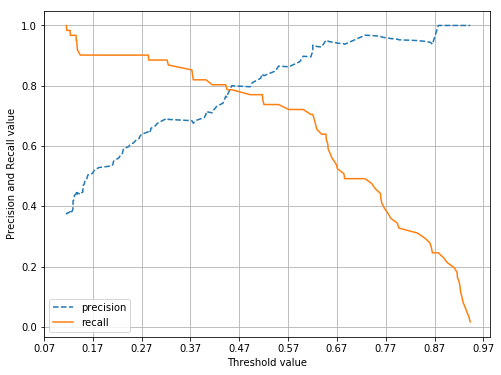

In [0]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test , pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot( y_test, lr_clf.predict_proba(X_test)[:, 1] )


앞 예제의 로지스틱 회귀 기반의 타이타닉 생존자 예측 모델의 경우 임곗값이 약 0.45인 지점에서 재현율과 정밀도가 비슷해지는 모습을 보였습니다.

### 3.4 F1 스코어(F1 Score)

F1  스코어는 정밀도와 재현율을 결합한 지표입니다.

정밀도와 재현율이 어느 한쪽으로 치우치지 않는 수치를 나타낼 때 상대적으로 높은 값을 가집니다.

F1 스코어의 공식은 다음과 같습니다.

<img src = "https://chrisalbon.com/images/machine_learning_flashcards/F1_Score_print.png">

사이킷런은 F1 스코어를 구하기 위해 f1_score()라는 API를 제공합니다.

이를 이용해 로지스틱 회귀 기반 타이타닉 생존다 모델의 F1 스코어를 구해보겠습니다.


In [0]:
# f1_score를 불러옵니다.
from sklearn.metrics import f1_score 

# y_test 값과, 예측값을 넣습니다.
f1 = f1_score(y_test , pred)

# F1스코어를 출력합니다.
print('F1 스코어: {0:.4f}'.format(f1))

F1 스코어: 0.7966


## [참고할만한 코드] 지금까지 배운 평가 지표 + F1스코어 구하기

이번에는 타이타닉 생존자 예측에서 임곗값을 변화시키면서  F1 스코어를 포함한 평가 지표를 구해보겠습니다.

In [0]:
def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    # F1 스코어 추가
    f1 = f1_score(y_test,pred)
    print('오차 행렬')
    print(confusion)
    # f1 score print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}'.format(accuracy, precision, recall, f1))

thresholds = [0.4 , 0.45 , 0.50 , 0.55 , 0.60]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)


임곗값: 0.4
오차 행렬
[[97 21]
 [11 50]]
정확도: 0.8212, 정밀도: 0.7042, 재현율: 0.8197, F1:0.7576
임곗값: 0.45
오차 행렬
[[105  13]
 [ 13  48]]
정확도: 0.8547, 정밀도: 0.7869, 재현율: 0.7869, F1:0.7869
임곗값: 0.5
오차 행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705, F1:0.7966
임곗값: 0.55
오차 행렬
[[111   7]
 [ 16  45]]
정확도: 0.8715, 정밀도: 0.8654, 재현율: 0.7377, F1:0.7965
임곗값: 0.6
오차 행렬
[[113   5]
 [ 17  44]]
정확도: 0.8771, 정밀도: 0.8980, 재현율: 0.7213, F1:0.8000


F1 스코어는 임곗값이 0.6일 때 가장 좋은 값을 보여줍니다.
하지만 임곗값이 0.6인 경우에는 재현율이 크게 감소하고 있으니 주지해야 합니다.

## 3-5 ROC Curve와 AUC

ROC곡선과 이에 기반한 AUC 스코어는 이진 분류의 예측 성능 측정에서 중요하게 사용되는 지표입니다.

Reciever Operation Characteristic Curve. 우리말로 수신자 판단 곡선.

이름이 약간 이상한 것은 원래 2차대전 때 통신 장비 성능 평가를 위해 고안된 수치이기 때문입니다.

일반적으로 의학 분야에서 많이 사용되지만, 

머신러닝의 이진 분류 모델의 예측 성능을 판단하는 중요한 평가 지표이기도 합니다.

ROC곡선은 FPR(False Positive Rate)이 변할 때 TPR(True Positive Rate - 재현율)이 어떻게 변하는지를 나타내는 곡선입니다.

FPR을 X축으로, TRP을 Y축으로 잡으면 FPR의 변화에 따른 TPR의 변화가 곡선 형태로 나타납니다.

TRP은  True Positive Rate 으로 재현율을 나타냅니다. 따라서 TP/(FN+TP) 입니다. 

그리고 재현도에 대응하는 지표로 TNR(True Negative Rate)이라고 불리는 특이성(Specificity)이 있습니다.

- TPR은 실제값 Poisitve 가 정확히 예측되어야 하는 수준을 나타냅니다. (질병이 있는 사람은 양성판정)
- TNR은 실제값 Negative가 정확히 예측되어야 하는 수준을 나타냅니다. (질병이 없는 사람은 음성판정)
- 그리고 ROC 곡선의 X축 기준인 FPR(False Positive Rate)은 1- TNR 또는 1-  특이성으로 표현합니다.



- TPR  = TP /(FN+TP)
- TNR = TN /(FP+TN)
- FPR = FP /(FP+TN) = 1 - TNR = 1 - 특이성 


다음은 ROC 곡선의 예입니다. 가운데 직선은 ROC 곡선의 최저값입니다. 
ROC 곡선이 가운데 직선에 가까울 수록 성능이 떨어지는 것이며 멀어질 수록 성능이 뛰어난 것입니다. 


<img src = "https://i.stack.imgur.com/2hrd4.png">


ROC 곡선은 FPR을 0부터 1까지 변경하면서 TRP의 변화값을 구합니다. 그럼 어떻게 FPR을 0부터 1까지 변경할 수 있을까요?
임곗값을 변경하면 됩니다. 

반대로 FPR을 어떻게 1로 만들 수 있을까요?
TN을 0으로 만들면 됩니다.
TN을 0으로 만들려면 임곗값을 0으로 지정하면 됩니다.

  
 
이렇게 임곗값을 0부터 1까지 변화시키면서 FPR을 구하고 이 FPR 값의 변화에 따른 TPR 값을 구하는 것이 ROC 곡선입니다.

(그래서 임곗값을 1부터 0까지 거꾸로 변화시키면서 구한 재현율 곡선의 형태와 비슷합니다.)


사이킷런은 ROC 곡선을 구하기 위해 **roc_curve() API**를 제공합니다.

사용법은 precision_recall_curve() API와 유사합니다.

단지 반환값이 FPR, TPR, 임곗값으로 구성되어 있을 뿐입니다.


- 입력 파라미터: y_true(실제 클래스값), y_score(Positive  칼럼의 예측확률)
- 반환 값: fpr, tpr, thresholds

In [0]:
## 타이타닉 생존자 예측 모델 roc_curve 결과 (FPR, TPR, 임곗값을 알게 됨)

from sklearn.metrics import roc_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1] 

fprs , tprs , thresholds = roc_curve(y_test, pred_proba_class1)
# 반환된 임곗값 배열 로우가 47건이므로 샘플로 10건만 추출하되, 임곗값을 5 Step으로 추출. 
thr_index = np.arange(0, thresholds.shape[0], 5)
print('샘플 추출을 위한 임곗값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값: ', np.round(thresholds[thr_index], 2))

# 5 step 단위로 추출된 임계값에 따른 FPR, TPR 값
print('샘플 임곗값별 FPR: ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR: ', np.round(tprs[thr_index], 3))


샘플 추출을 위한 임곗값 배열의 index 10개: [ 0  5 10 15 20 25 30 35 40 45]
샘플용 10개의 임곗값:  [1.94 0.87 0.63 0.55 0.44 0.32 0.15 0.14 0.13 0.12]
샘플 임곗값별 FPR:  [0.    0.008 0.025 0.059 0.127 0.203 0.559 0.602 0.695 0.847]
샘플 임곗값별 TPR:  [0.    0.246 0.672 0.738 0.787 0.885 0.902 0.951 0.967 0.984]


임곗값이 1에 가까운 값에서 점점 작아지면서 FPR이 점점 커집니다.
그리고 FPR이 조금씩 커질 때 TPR은 가파르게 커집니다.
FPR의 변화에 따른 TPR의 변화를 ROC 곡선으로 시각화해보겠습니다.


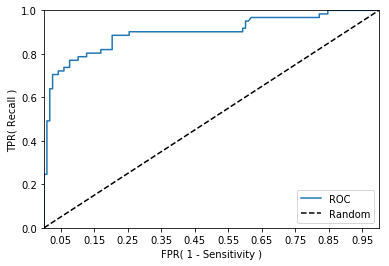

In [0]:
def roc_curve_plot(y_test , pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환 받음. 
    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1)

    # ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
    # 가운데 대각선 직선을 그림. 
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    
    # FPR X 축의 Scale을 0.1 단위로 변경, X,Y 축명 설정등   
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1] )


일반적으로 ROC 곡선 자체는 FPR과 TPR의 변화 값을 보는 데 이용하며 분류의 성능 지표로 사용되는 것은 ROC 곡선 면적에 기반한 AUC 값으로 결정합니다.

AUC(Area Under Curve) 값은 ROC 곡선 밑의 면적을 구한 것으로서 일반적으로 1에 가까울수록 좋은 수치입니다.

AUC 수치가 커지려면 FPR이 작은 상태에서 얼마나 큰 TPR을 얻을 수 있느냐가 관건입니다.

가운데 직선에서 멀어지고 왼쪽 상단 모서리 쪽으로 가파르게 곡선이 이동할수록 직사각형에 가까운 곡선이 되어 면적이 1에 가까워지는 좋은  ROC AUC 성능 수치를 얻게 됩니다. 가운데 대각선 직선은 랜덤 수준의 이진 분류 AUC값으로 0.5입니다. 따라서 보통 분류는 0.5이상의 AUC값을 가집니다.

사이킷런은 ROC AUC를 구하기 위해 roc_auc_score() API를 제공합니다.

앞의 로지스틱 회귀 타이타닉 예측 모델의 ROC AUC 를 구해보겠습니다.

In [0]:
from sklearn.metrics import roc_auc_score

pred = lr_clf.predict(X_test)
roc_score = roc_auc_score(y_test, pred)
print('ROC AUC 값: {0:.4f}'.format(roc_score))


ROC AUC 값: 0.8429


In [0]:
def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    
thresholds = [0.4 , 0.45 , 0.50 , 0.55 , 0.60]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.4
오차 행렬
[[97 21]
 [11 50]]
정확도: 0.8212, 정밀도: 0.7042, 재현율: 0.8197,    F1: 0.7576, AUC:0.8209
임곗값: 0.45
오차 행렬
[[105  13]
 [ 13  48]]
정확도: 0.8547, 정밀도: 0.7869, 재현율: 0.7869,    F1: 0.7869, AUC:0.8384
임곗값: 0.5
오차 행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705,    F1: 0.7966, AUC:0.8429
임곗값: 0.55
오차 행렬
[[111   7]
 [ 16  45]]
정확도: 0.8715, 정밀도: 0.8654, 재현율: 0.7377,    F1: 0.7965, AUC:0.8392
임곗값: 0.6
오차 행렬
[[113   5]
 [ 17  44]]
정확도: 0.8771, 정밀도: 0.8980, 재현율: 0.7213,    F1: 0.8000, AUC:0.8395
